# Моделирование  нелинейной динамики корабля

Модель движения судна в горизонтальной плоскости описывается нелинейной нестационарной динамической системой
$$
\begin{split}
& \dot{x}(t)=A(x(t))x(t)+B(x(t))u(t)+\varphi(x(t), u(t)) + Df_d(x(t), \Delta(B_{aw})),\\
& y = Cx(t) + \upsilon(t)
\end{split}
$$
где  
- $A(x(t))$, $B(x(t))$, $C$   – матрицы динамики входа и выхода? соответственно (см. Приложение A)
- $\varphi(x(t), u(t))$  – вектор функций, отражающий нелинейную динамику системы,   
- $x(t)=[V_x(t), V_y(t), \omega_z(t), K(t)]^T$– вектор состояния, составляющими которого являются:
    - $V_x(t), V_y(t)$ - проекции относительной скорости на продольную X и поперечную Y оси связанной с судном системы координат (СКК)
    - $\omega_z(t)$ - проекция угловой скорости на вертикальную ось Z СКК
    - $K(t)$ - курс судна по оси Z СКК;
- $u(t)=[f(\alpha(t)), \delta(t)]^T$ – вектор управления, составляющими которого являются:
    - $f(\alpha(t))$ - шаговое отношение гребного винта,  $\alpha(t)$ - угол отклонения лопастей винта регулируемого шага (ВРШ)
    - $\delta(t)$ - угол перекладки руля
- $D$ - матрица возмущений
- $f_d(x(t), \Delta(B_{aw}))$ – вектор возмущающих сил и моментов по осям X, Y и Z СКК, которые зависят как от параметров движения судна  $x(t)$, так и от гидрометеорологических условий, таких как ветер и волнение $\Delta(B_{aw})=[V_a(B_{aw}), K_a, \omega_w(B_{aw}), h_v(B_{aw}), K_w]^T$, определяемых балльностью  $B_{aw}$:
    - $V_a(B_{aw})$ - скорость ветра
    - $K_a$ - направление ветра
    - $\omega_w(B_{aw})$ -частота волны
    - $h_v(B_{aw})$ - высота волны
    - $K_w$ - угол набегающей волны

В таблице 1 представлены значения параметров возмущений в зависимости от балльности 
| Бальность $B_{aw}$ | Скорость ветра $V_a$, м/с| Высота волны $h_v$, м | Частота волны $\omega_w$,$c^{-1}$|
| --- | --- | --- | --- |
| 0   | 0   | 0   | 3   |
| 1   | 0.5 | 0.25 | 2.57 |
| 2   | 1.7 | 0.75 | 2   |
| 3   | 3.3 | 1.25 | 1.31 |
| 4   | 5.2 | 2   | 1.08 |
| 5   | 7.4 | 3.5 | 0.809 |
| 6   | 9.8 | 6   | 0.636 |
| 7   | 12.4 | 8.5 | 0.555 |
| 8   | 15  | 11  | 0.508 |
| 9   | 20  | \-  | \-  |

ПРИМЕЧАНИЕ: для простоты принято, что балльность ветра равна балльности волнения, а также что балльность неизменна на интервале одной временной реализации при моделировании.

  - Итоговые значения возмущающих сил и моментов будут зависеть от:
    - $V_k(t)$ кажущейся скорости ветра,
    - $\gamma(t)$ направления кажущегося ветра,
    - $\omega_k(t)$ кажущейся частоты набегающей волны,
    -  $\alpha_w(t), \dot{\alpha}_w(t)$ угла склона набегающей волны и его производной,
- $\upsilon(t) = [V_x^{err}(t), V_y^{err}(t), \omega_z^{err}(t), K^{err}(t)]^T$ – вектор шумов измерений, который задается с помощью модели погрешностей лага (для составляющих линейной скорости) и с помощью модели погрешностей ИНС (для составляющих угловой скорости и курса).

Предполагается, что реализованы функции стабилизации судна на заданном курсе $K^{set}$  и по заданной скорости   с помощью двух ПИД-регуляторов с учетом ограничений исполнительных устройств:
- $\max |\alpha (t)|= 35$ град, $\max |\dot{\alpha} (t)|= 1.5$ град/с
- $\max |\delta (t)|= 25$ град, $\max |\dot{\delta} (t)|= 2.5$ град/с

Переменные $S_N(t)$ и $S_E(t)$ отражают перемещение судна на плоскости ($N$ – северная составляющая, $E$ – восточная составляющая) и рассчитываются по формулам:
$$
\begin{split}
V_N(t) = V_x(t)\cos K(t)-V_y(t) \sin K(t)\\
V_E(t) = V_x(t)\sin K(t)-V_y(t) \cos K(t)\\
S_N(t) = S_N(t-1) + V_N(t)dt \\
S_E(t) = S_E(t-1) + V_E(t)dt
\end{split}
$$

Предполагается, что начальные координаты  $S_N(0)=0$, $S_E(0)=0$.

## Сценарии движения

- Сценарий № 1: движение судна по заданному курсу $K^{set}=const$, c изменением скорости хода $V_x^{set}$  в интервале [1:10] м/с в случайный момент времени. Начальные условия по скорости и курсу случайны.
- Сценарий № 2: движение судна с постоянной скоростью  $K^{set}=const$, c изменением курса $K^{set}$  в интервале [1:360] град. в случайный момент времени. Начальные условия по скорости и курсу случайны.

ПРИМЕЧАНИЕ: В рамках сценария (в начале и в конце) добавлен защитный интервал 10 мин., на котором не происходят события, связанные с изменением параметров движения. Кроме того, стоит исключить первые 2 мин. из обработки, из-за наличия переходных процессов.

## Матрицы нелинейной модели движения
Рассмотрим динамику без возмущений
$$
\begin{split}
&\dot{V}_x = \tilde{a}_0(V, n)V_x-\tilde{n}_{01}V_x^2 + \tilde{n}_{02}V_y\omega_z - \tilde{X}_tV^2\delta^2+\tilde{T}(n)f(\alpha)\\
&\dot{V}_y = \tilde{a}_{11}VV_y + \tilde{a}_{12}V\omega_z + \tilde{n}_{11}V_y|V_y| + \tilde{n}_{12}V_y\omega_z \textrm{sign}(V_y\omega_z)+\tilde{Y}_tV^2\delta\\
& \dot{\omega}_z = \tilde{a}_{21}VV_y + \tilde{a}_{22}V\omega_z + \tilde{M}_tV^2\delta\\
&\dot{K} = \omega_z 
\end{split}
$$

где
- $F_{x1}=\tilde{a}_0(V, n)V_x$ - составляющая силы тяги гребного винта
- $F_{x2}=\tilde{n}_{01}V_x^2$ - сила сопротивления корпуса судна
- $F_{x3}=\tilde{n}_{02}V_y\omega_z$ - сила, вызванная боковым движением судна
- $F_{x4}=\tilde{X}_tV^2\delta^2$ - сила сопротивления на руле
- $F_{x5}=\tilde{T}(n)f(\alpha)$ - составляющая силы тяги гребного винта
- $F_{y1}=\tilde{a}_{11}VV_y$
- $F_{y2} = \tilde{a}_{12}V\omega_z$
- $F_{y3}=\tilde{n}_{11}V_y|V_y|$
- $F_{y4}=\tilde{n}_{12}V_y\omega_z \textrm{sign}(V_y\omega_z)$ - сила, вызванная боковым движением судна
- $F_{y5}=\tilde{Y}_tV^2\delta$ - сила сопротивления на руле
- $M_{z1}=\tilde{a}_{21}VV_y, M_{z2}=\tilde{a}_{22}V\omega_z$ - моменты бокового движения
- $M_{z3}=\tilde{M}_tV^2\delta$ - момент сопротивления на руле
- $V = \sqrt{V_x^2 + V_y^2}$ - скорость относительно воды
- $n$ - частота вращения гребного вала.

ПРИМЕЧАНИЕ: Символ «~» при коэффициенте силы или момента указывает на то, что коэффициент уже приведен к центру масс или инерции соответственно.

Матрица динамики
$$
A(V, n)=
\begin{bmatrix}
\tilde{a}_0(V, n) & 0 & 0 & 0 \\
0 & \tilde{a}_{11}V & \tilde{a}_{12}V & 0 \\
0 & \tilde{a}_{21}V & \tilde{a}_{22}V & 0 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

Матрица управления
$$
B(V, n)=
\begin{bmatrix}
\tilde{T}(n) & 0 \\
0 & \tilde{Y}_tV^2 \\
0 & \tilde{M}_tV^2 \\
0 & 0 
\end{bmatrix}
$$

Вектор функций, отражающих нелинейную динамику:
$$
\varphi(x(t), u(t))=
\begin{bmatrix}
-\tilde{n}_{01}V_x^2 + \tilde{n}_{02}V_y\omega_z - \tilde{X}_tV^2\delta^2\\
\tilde{n}_{11}V_y|V_y| + \tilde{n}_{12}V_y\omega_z \textrm{sign}(V_y\omega_z)\\
0\\
0
\end{bmatrix}
$$

Матрица выхода
$$
C=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

### Коэффициенты матриц
ПРИМЕЧАНИЕ: для простоты принято, что частота вращения гребного вала при движении $n=const$ (по умолчанию 2,5 об./с), а скорость регулируется только углом отклонения лопастей ВРШ;

- $\tilde{a}_0(V, n)=0.0021n^2(1-w)$, при $|V|<0.5$ м/с $w=0$, иначе $V=0.15$. Обозначим $k_{\tilde{a}_0} = 0.0021, W_{min}=0, w_{max}=0.15$
- $\tilde{a}_{11} = -0.0078$
- $\tilde{a}_{12} = -0.8828$
- $\tilde{a}_{21} = -2.44 \times 10e-5$
- $\tilde{a}_{22} = -0.0162$
- $\tilde{T}(n)=0.0112 |n|^3$. Обозначим $k_{\tilde{T}}=0.0112$
- $\tilde{Y}_r = -0.0032$
- $\tilde{M}_r = -4.9 \times 10e-5$
- $\tilde{n}_{01} = 1.187 \times 10e-4$
- $\tilde{n}_{02} = 1.1351$
- $\tilde{X}_r = 0.0025$
- $\tilde{n}_{11} = -0.0202$
- $\tilde{n}_{12} = -1.3224$

Шаговое отношение гребного винта
$$
f(\alpha) = \pi \tg (\alpha)
$$

## Возмущения

$$
\begin{split}
&\dot{V}_x = ... + F_{ax} \\
&\dot{V}_y = ... + F_{ay} + F_{wy}\\
&\dot{\omega}_z = ... + M_{az} + M_{wz}
\end{split}
$$
где  $F_{ax}$, $F_{ay}$, $M_{az}$   – силы и моменты, вызванные ветром, $F_{wy}$, $M_{wz}$ ,   – силы и моменты, вызванные волнением.

Ветровые составляющие определяются как: 
$$
\begin{split}
&F_{ax}(x(t), \Delta(B_a)) = \tilde{d}_0V_k^2 \cdot CS, \\
& F_{ay}(x(t), \Delta(B_a)) = \tilde{d}_{11}V_k^2 \cdot SN \\
& M_{az} = \tilde{d}_{21} (0.075 - \frac{|\gamma|}{2\pi})V_k^2 \cdot SN
\end{split}
$$
где  $\tilde{d}_0$, $\tilde{d}_{11}$, $\tilde{d}_{21}$   – коэффициенты, зависящие от конструкции судна,  $V_k$ – кажущаяся скорость ветра,  $\gamma$ – кажущееся направление ветра.

При $V_a(B_a)<0.2$ м/c
$$
V_k^2 = V_x^2
$$
Иначе
$$
V_k^2 = V_x^2 + V_a^2(B_a) - 2V_xV_a(B_a)\cos (K_a - K + \beta)
$$
где $\beta=-atan2(V_y, V_x)$ - угол дрейфа.
$$
\gamma = atan2(SN, CS)
$$

При $V_k<0.2$, $SN = 0, CS = 1$, иначе 
$$
\begin{split}
&SN = \left(V_x \sin (\beta) + V_a(B_a) \sin (K_a - K) \right) / V_k \\
&CS = \left(-V_x\cos (\beta) + V_a(B_a) \cos (K_a - K) \right)/V_k
\end{split}
$$

Составляющие от волнения определяются как:
$$
\begin{split}
& F_{wy}(x(t), \Delta(B_a)) = \tilde{d}_{12}a_w, \\
& M_{wz}(x(t), \Delta(B_a)) = \tilde{d}_{22}\frac{\omega_w^2(B_w)}{\omega_w^2}\dot{\alpha}_w
\end{split}
$$
где $\tilde{d}_{12}$, $\tilde{d}_{22}$, – коэффициенты, зависящие от конструкции судна, $\omega_w$  – кажущаяся частота набегающей волны, $\alpha_w$ , $\dot{\alpha}_w$  – угол склона набегающей волны и его производная.
$$
\begin{split}
w_k = |1 + V_x \cos (K_w-K)\frac{\omega_w(B_w)}{g}|\omega_w(B_w),\\
\alpha_w = -\omega_w^2(B_w)h_w(B_w)\frac{\sin (\omega_k t)}{2g}, \\
\dot{\alpha}_w = \omega_w^2(B_w)h_w(B_w)\frac{\cos (\omega_k t)}{2g}
\end{split}
$$
где  $g$ – ускорение свободного падения.

Матрица возмущений
$$
D = \begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 1\\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

Вектор возмущающих сил и моментов
$$
f_d(x(t), \Delta(B_{aw}))=
\begin{bmatrix}
\tilde{d}_0V_k^2 \cdot CS\\
\tilde{d}_{11}V_k^2 \cdot SN\\
\tilde{d}_{21} (0.075 - \frac{|\gamma|}{2\pi})V_k^2 \cdot SN\\
\tilde{d}_{12}a_w\\
\tilde{d}_{22}\frac{\omega_w^2(B_w)}{\omega_w^2}\dot{\alpha}_w
\end{bmatrix}
$$

### Коэффициенты
- $\tilde{d}_0=-8.87\cdot 1e-7$ 
- $\tilde{d}_{11} =-3.74\cdot 1e-6$ 
- $\tilde{d}_{21} =2.24\cdot 1e-6$ 
- $\tilde{d}_{12} =-7.77\cdot 1e-10$ 
- $\tilde{d}_{22} =-1.6\cdot 1e-14$ 

## Шумы измерений

Модель погрешностей лага и инерциальной навигационной системы описываются следующими уравнениями:
$$
\begin{split}
\dot{\varepsilon} = F\varepsilon(t) +Gw(t), \\
\upsilon(t) = H \varepsilon(t)
\end{split}
$$
где  $\varepsilon (t) = [V_x^{err}, V_y^{err}, \omega_z^{err}, K^{err}, \dot{K}^{err}]^T$ – вектор состояния модели погрешностей,  $w(t)$ – вектор порождающих белых шумов единичной интенсивности.

Матрицы $F, G, H$, входящие в систему, имеют следующий вид:
$$
F=
\begin{bmatrix}
-\alpha_1 & 0 & 0 & 0 & 0 \\
0 & -\alpha_1 & 0 & 0 & 0 \\
0 & 0 & -\alpha_2 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & k & \beta^2 & -2\alpha^3 \\
\end{bmatrix}
$$

$$
G=
\begin{bmatrix}
\sigma_1\sqrt{2\alpha_1} & 0 & 0 & 0 \\
0 & \sigma_1\sqrt{2\alpha_1} & 0 & 0 \\
0 & 0 & \sigma_1\sqrt{2\alpha_1} & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & g_3 \\
\end{bmatrix}
$$

$$
H=
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

Здесь 
- $\sigma_1 = 0,03$ м/с – СКП измерений составляющих линейной скорости;   
- $\alpha_1 = 1/30$ с–1 – величина, обратная времени корреляции погрешностей измерения линейной скорости;
- $\sigma_2 = \pi/1800$ – СКП измерений угловой скорости;
- $\alpha_2 = 1/1800$ с–1 – величина, обратная времени корреляции погрешности измерения угловой скорости;
- $\alpha_3 = 3 \cdot 1e-4$ с–1 – величина, обратная времени корреляции погрешности измерения курса;
- $\beta = 2\pi /(84,4·60)$ с–1; – частота шулеровских колебаний погрешности измерения курса;
- $k = 2·10–5$ с–1; 
- $g3 = 10^{–7} с^{-3/2}$.


## Начальные условия
формируются как гауссовский центрированный вектор с матрицей ковариаций
$$
P=
\begin{bmatrix}
\sigma_1^2, 0, 0, 0, 0\\
0, \sigma_1^2, 0, 0, 0\\
0, 0, \sigma_2^2, P_{34}, P_{35}\\
0, 0, P_{34}, P_{44}, 0\\
0, 0, P_{35}, 0, P_{55}\\
\end{bmatrix}
$$
где
$$
\begin{split}
& P_{34} = \frac{k\sigma_2^2}{\beta^2+\alpha_2(\alpha_2+2\alpha_3)}\\
& P_{35} = \alpha_2P_{34}\\
& P_{44} = \frac{2k(\alpha_2 + 2\alpha_3)P_{34}+g_3^2}{4\alpha_3\beta^2}\\
&P_{55} = \frac{2kP_{35}+g_3^2}{4\alpha_3}
\end{split}
$$

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

# Матрицы динамики
k_tilde_a0 = 0.0021
w_min = 0
w_max = 0.15
tilde_a11 = -0.0078
tilde_a12 = -0.8828
tilde_a21 = -2.44 * 10**(-5)
tilde_a22 = -0.0162
k_tilde_T = 0.0112
tilde_Yr = -0.0032
tilde_Mr = -4.9 * 10**(-5)
tilde_n01 = 1.187 * 10**(-4)
tilde_n02 = 1.1351
tilde_Xr = 0.0025
tilde_n11 = -0.0202
tilde_n12 = -1.3224
n = 2.5
# Возмущения
k_M_az = 0.075
tilde_d0 = -8.87 * 10**(-7)
tilde_d11 = -3.74 * 10**(-6)
tilde_d21 = 2.24 * 10**(-6)
tilde_d12 = -7.77 * 10**(-10)
tilde_d22 = -1.6 * 10**(-14)
# Шумы
sigma_1 = 0.03
alpha_1 = 1/30
sigma_2 = np.pi/1800
alpha_2 = 1/1800
alpha_3 = 3 * 10**(-4)
beta = 2 * np.pi / (84.4*60)
k = 2 * 10**(-5)
g3 = 10**(-7)
F = np.array([[-alpha_1, 0, 0, 0, 0],
              [0, -alpha_1, 0, 0, 0],
              [0, 0, -alpha_2, 0, 0],
              [0, 0, k, -beta**2, -2*alpha_3]])
G = np.array([[sigma_1*np.sqrt(2*alpha_1), 0, 0, 0],
              [0, sigma_1*np.sqrt(2*alpha_1), 0, 0],
              [0, 0, sigma_2*np.sqrt(2*alpha_2), 0],
              [0, 0, 0, 0],
              [0, 0, 0, g3]])
H = np.array([[1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0]])
# Начальные условия
P_34 = k * sigma_2**2 / (beta**2 +alpha_2 * (alpha_2 + 2*alpha_3))
P_35 = alpha_2 * P_34
P_44 = (2*k * (alpha_2 + 2*alpha_3) * P_34 + g3**2) / (4 * alpha_3 * beta**2)
P_55 = (2*k*P_35 + g3**2) / (4*alpha_3)
P = np.array([[sigma_1**2, 0, 0, 0, 0],
              [0, sigma_1**2, 0, 0, 0],
              [0, 0, sigma_2**2, P_34, P_35],
              [0, 0, P_34, P_44, 0],
              [0, 0, P_35, 0, P_55]])
# Таблица ветра и волн от бальности (Va, h_w, omega_w)
B_aw_table = np.array([[0, 0, 3],
                       [0.5, 0.25, 2.57],
                       [1.7, 0.75, 2],
                       [3.3, 1.25, 1.31],
                       [5.2, 2, 1.08],
                       [7.4, 3.5, 0.819],
                       [9.8, 6, 0.636],
                       [12.4, 8.5, 0.555],
                       [15, 11, 0.508]])

In [90]:
B_aw = 3 # балльность
# Параметры, которые требуется идентифицировать
identification_params = {'n': 2.5,
                         'w_min': w_min,
                         'w_max': w_max,
                         'tilde_a11': tilde_a11,
                         'tilde_a12': tilde_a12,
                         'tilde_a21': tilde_a21,
                         'tilde_a22': tilde_a22,
                         'k_tilde_T': k_tilde_T,
                         'tilde_Yr': tilde_Yr,
                         'tilde_Mr': tilde_Mr,
                         'tilde_n01': tilde_n01,
                         'tilde_n02': tilde_n02,
                         'tilde_Xr': tilde_Xr,
                         'tilde_n11': tilde_n11,
                         'tilde_n12': tilde_n12,
                         'tilde_d0': tilde_d0,
                         'tilde_d11': tilde_d11,
                         'tilde_d21': tilde_d21,
                         'tilde_d12': tilde_d12,
                         'tilde_d22': tilde_d22,
                         'k_M_az': k_M_az,
                         'Va': B_aw_table[B_aw, 0],
                         'h_w': B_aw_table[B_aw, 1],
                         'omega_w': B_aw_table[B_aw, 2],
                         'Ka': np.pi/6, # направление ветра
                         'Kw': np.pi/3, # угол набегающей волны
                         } 

In [91]:
# Вспомогательные функции для расчета матриц
def get_V(state):
   state = state.ravel()
   return np.sqrt(state[0]**2 + state[1]**2)

def get_tilde_a0(V, n, k_w_min, k_w_max):
    if V < 0.5:
      w = k_w_min
    else:
      w = k_w_max
    return k_tilde_a0 * n * n * (1-w) 

def get_tilde_T(n, k_tilde_T):
   return k_tilde_T * np.abs(n)**3

def f_alpha(alpha):
   return np.pi * np.tan(alpha)

def get_Vk(state, identification_params):
   state = state.ravel()
   Vx = state[0]
   K = state[3]
   Va = identification_params['Va']
   Ka = identification_params['Ka']
   if identification_params['Va'] < 0.2:
      Vk = np.sqrt(Vx)
   else:
      Vk = np.sqrt(Vx**2 + Va**2 - 2*Vx*Va*np.cos(Ka -K + beta))
   return Vk

def get_SN_CS(state, identification_params):
   Vk = get_Vk(state, identification_params)
   if Vk < 0.2:
      SN = 0
      CS = 1
   else:
      state = state.ravel()
      Vx = state[0]
      Vy = state[1]
      K = state[3]
      Va = identification_params['Va']
      Ka = identification_params['Ka']
      beta = -np.arctan2(Vy, Vx)
      SN = (Vx * np.sin(beta) + Va * np.sin(Ka - K)) / Vk
      CS = (-Vx * np.cos(beta) + Va * np.cos(Ka - K))/ Vk
   return SN, CS

def get_A(state, identification_params):
   V = get_V(state)
   tilde_a0 = get_tilde_a0(V, identification_params['n'], identification_params['w_min'], identification_params['w_max'])
   A = np.array([[tilde_a0, 0, 0, 0],
                 [0, identification_params['tilde_a11']*V, identification_params['tilde_a12']*V, 0],
                 [0, identification_params['tilde_a21']*V, identification_params['tilde_a22']*V, 0],
                 [0, 0, 1, 0]])
   return A

def get_B(state, identification_params):
   V = get_V(state)
   tilde_T = get_tilde_T(identification_params['n'], identification_params['k_tilde_T']) 
   B = np.array([[tilde_T, 0],
                 [0, identification_params['tilde_Yr']* V**2],
                 [0, identification_params['tilde_Mr']* V**2],
                 [0, 0]])
   return B


def get_phi(state, u, identification_params):
   V = get_V(state)
   state = state.ravel()
   Vx = state[0]
   Vy = state[1]
   omega_z = state[2]
   u = u.ravel()
   delta = u[1]
   phi = np.array([[-identification_params['tilde_n01'] * Vx**2 + 
                    identification_params['tilde_n02'] * Vy * omega_z -
                    identification_params['tilde_Xr'] * V**2 * delta**2],
                    [identification_params['tilde_n11'] * Vy * np.abs(Vy)+
                     identification_params['tilde_n12'] * Vy * omega_z * np.sign(Vy * omega_z)],
                     [0],
                     [0]])
   return phi

def get_C():
   return np.eye(4)

def get_D():
   D = np.array([[1, 0, 0, 0, 0],
                 [0, 1, 0, 1, 0],
                 [0, 0, 1, 0, 1],
                 [0, 0, 0, 0, 0]])
   return D

def get_fd(state, identification_params, t):
   state = state.ravel()
   Vx = state[0]
   K = state[3]
   tilde_d0 = identification_params['tilde_d0']
   Vk = get_Vk(state, identification_params)
   SN, CS = get_SN_CS(state, identification_params)
   tilde_d11 = identification_params['tilde_d11']
   tilde_d21 = identification_params['tilde_d11']
   k_M_az = identification_params['k_M_az']
   gamma = np.arctan2(SN, CS)
   tilde_d12 = identification_params['tilde_d12']
   omega_w = identification_params['omega_w']
   Kw = identification_params['Kw']
   h_w = identification_params['h_w']
   omega_k = np.abs(1 + Vx * np.cos(Kw-K)* omega_w / 9.81) * omega_w
   alpha_w = -omega_w**2 * h_w * np.sin(omega_k * t) / (2 * 9.81)
   dot_alpha_w = omega_w**2 * h_w * np.cos(omega_k *t)/ (2 * 9.81)

   fd = np.array([[tilde_d0 * Vk**2 * CS],
                  [tilde_d11 * Vk**2 * SN],
                  [tilde_d21 * (k_M_az - np.abs(gamma)/(2*np.pi)) * Vk**2 * SN],
                  [tilde_d12 * alpha_w],
                  [tilde_d22 * omega_w**2 / omega_k**2 * dot_alpha_w]])
   return fd    
   

In [97]:
# Регуляторы
class PID:
    def __init__(self, kp, ki, kd, dt, u_min, u_max):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.ierror = 0
        self.y_prev = 0
        self.dt = dt
        self.u_min = u_min
        self.u_max = u_max
    def get_u(self, y, y_set):
        error = y_set - y
        self.ierror += error * self.dt
        derror = (y - self.y_prev) / self.dt
        u = self.kp * error + self.ki * self.ierror + self.kd * derror
        if u > self.u_max:
            u = self.u_max
        elif u < self.u_min:
            u = self.u_min
        self.y_prev = y
        return u
    
pid_V = PID(1, 0.001, 3, 0.1, -2.2, 2.2) 
pid_K = PID(0.03, 0.001, 0, 0.1, -25*np.pi/180, 25*np.pi/180)

In [98]:
# Уравнение динамики
def dxdt(t, x, time_points, set_points, params):
    # Желаемле состояние (скорость и курс)
    rows = set_points.shape[0]
    set_point = []
    for i in range(rows):
        temp = set_points[i, :].ravel()
        set_point_i = np.interp(t,time_points, temp)
        set_point.append(set_point_i)
    set_point = np.array(set_point).reshape(rows, 1).ravel()
    
    # Расчет управляющих воздействий
    V, K = x.ravel()[0], x.ravel()[-1]
    V_set, K_set = set_point[0], set_point[1]
    u_V = pid_V.get_u(V, V_set)
    u_K = pid_K.get_u(K, K_set)
    u = np.array([[u_V], [u_K]])
    
    A = get_A(x, params)
    B = get_B(x, params)
    C = get_C()
    D = get_D()
    fd = get_fd(x, params, t)
    phi = get_phi(x, u, params)    

    dxdt = np.matmul(A, x.reshape(-1, 1)) + np.matmul(B, u) + phi + np.matmul(D, fd)
    return dxdt.ravel()

In [99]:
x0 = np.array([0, 0, 0, 0])
simulation_time = np.linspace(0, 1000, 10000)
set_V = [2]*5000 + [5] * 5000
set_K = [0] * 5000 + [np.pi/4]*5000
set_points = np.c_[set_V, set_K].T

sol = solve_ivp(dxdt, 
                t_span=[simulation_time[0], simulation_time[-1]], 
                t_eval=simulation_time,
                y0=x0.ravel(), 
                method='RK45',
                args=(simulation_time, set_points,identification_params)) # при идентификации подставлять оценки, а не реальные значения

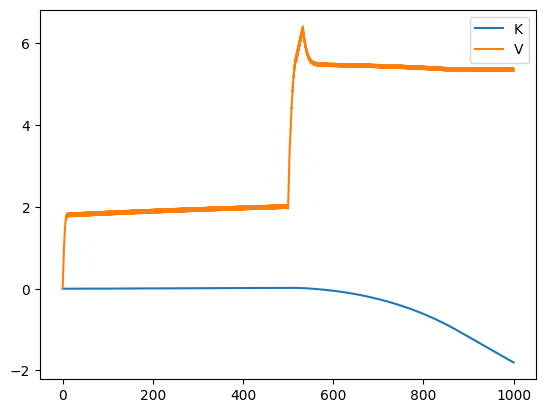

In [104]:
sol['y'].shape
plt.plot(sol['t'], sol['y'][3, :], label='K')
plt.plot(sol['t'], sol['y'][0, :], label='V')
plt.legend()